In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [4]:
df.target.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(1437, 1437, 360, 360)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
X_train

array([[ 0.        , -0.34169755, -0.46336049, ...,  1.05270303,
         0.45952251, -0.19710003],
       [ 0.        , -0.34169755,  0.78471641, ..., -0.64451929,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -1.08739895, ..., -0.13535259,
        -0.50623083, -0.19710003],
       ...,
       [ 0.        , -0.34169755,  0.78471641, ...,  1.56186972,
        -0.02335416, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -1.15368598,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -0.98396375,
        -0.50623083, -0.19710003]])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 5, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 2, 9, 3, 4, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [10]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test) # accuracy_score(y_test,y_pred)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9750


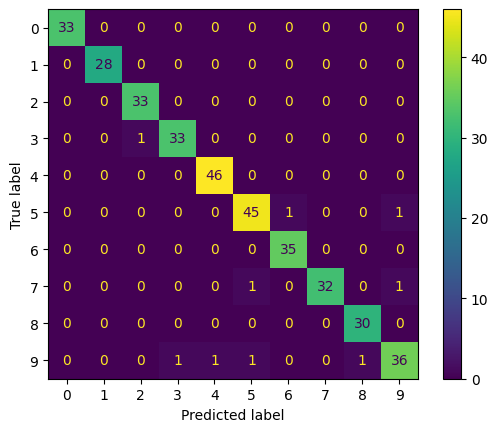

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

# IRIS DATASET

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.sample(10, random_state=54)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
45,4.8,3.0,1.4,0.3,0
91,6.1,3.0,4.6,1.4,1
103,6.3,2.9,5.6,1.8,2
94,5.6,2.7,4.2,1.3,1
96,5.7,2.9,4.2,1.3,1
42,4.4,3.2,1.3,0.2,0
79,5.7,2.6,3.5,1.0,1
116,6.5,3.0,5.5,1.8,2
4,5.0,3.6,1.4,0.2,0


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.0000
